In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Agenda

1. Tips and tricks in matplotlib
2. subplots
3. New graphs : 3D graphs
4. Heatmap
5. Pandas plot function

#### Colored scatter plots

In [2]:
iris = pd.read_csv('data/iris.csv')

In [3]:
iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
119,120,6.0,2.2,5.0,1.5,Iris-virginica
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
2,3,4.7,3.2,1.3,0.2,Iris-setosa
35,36,5.0,3.2,1.2,0.2,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa


In [4]:
iris['Species'] = iris['Species'].replace({'Iris-virginica':0,'Iris-versicolor':1,'Iris-setosa':2})

/var/folders/2n/v2zy3n991d94k9g19pvh8k5m0000gn/T/ipykernel_74550/1737169071.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris['Species'] = iris['Species'].replace({'Iris-virginica':0,'Iris-versicolor':1,'Iris-setosa':2})


In [5]:
iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
16,17,5.4,3.9,1.3,0.4,2
24,25,4.8,3.4,1.9,0.2,2
20,21,5.4,3.4,1.7,0.2,2
63,64,6.1,2.9,4.7,1.4,1
64,65,5.6,2.9,3.6,1.3,1


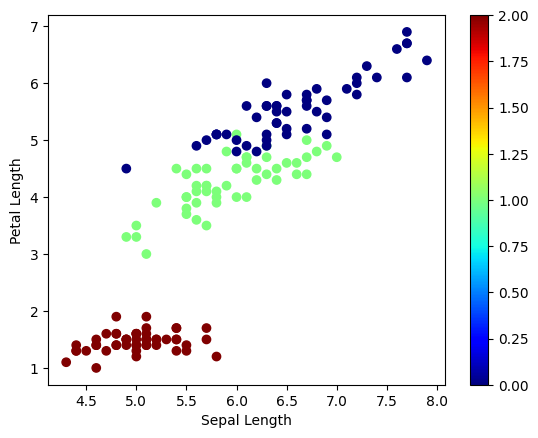

In [7]:
plt.scatter(iris['SepalLengthCm'],iris['PetalLengthCm'],c=iris['Species'],cmap='jet')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.colorbar()

#### Plot size

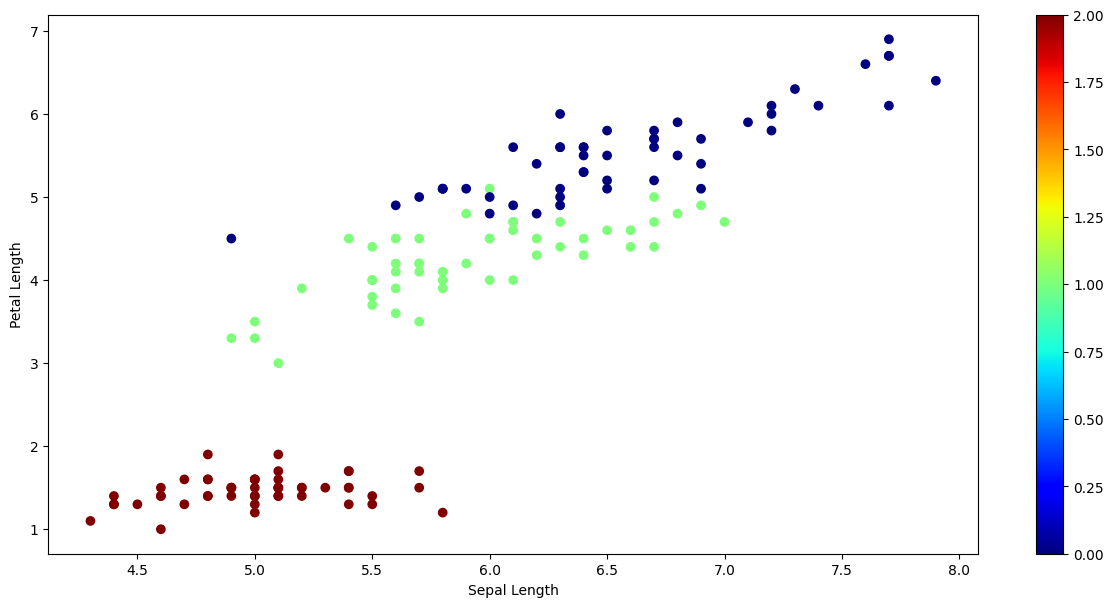

In [8]:
plt.figure(figsize=(15,7))

plt.scatter(iris['SepalLengthCm'],iris['PetalLengthCm'],c=iris['Species'],cmap='jet')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.colorbar()

#### Annotations

In [9]:
batters = pd.read_csv('data/batter.csv')

In [10]:
batters.shape

(605, 4)

In [12]:
sample_df = batters.head(100).sample(25,random_state=5)

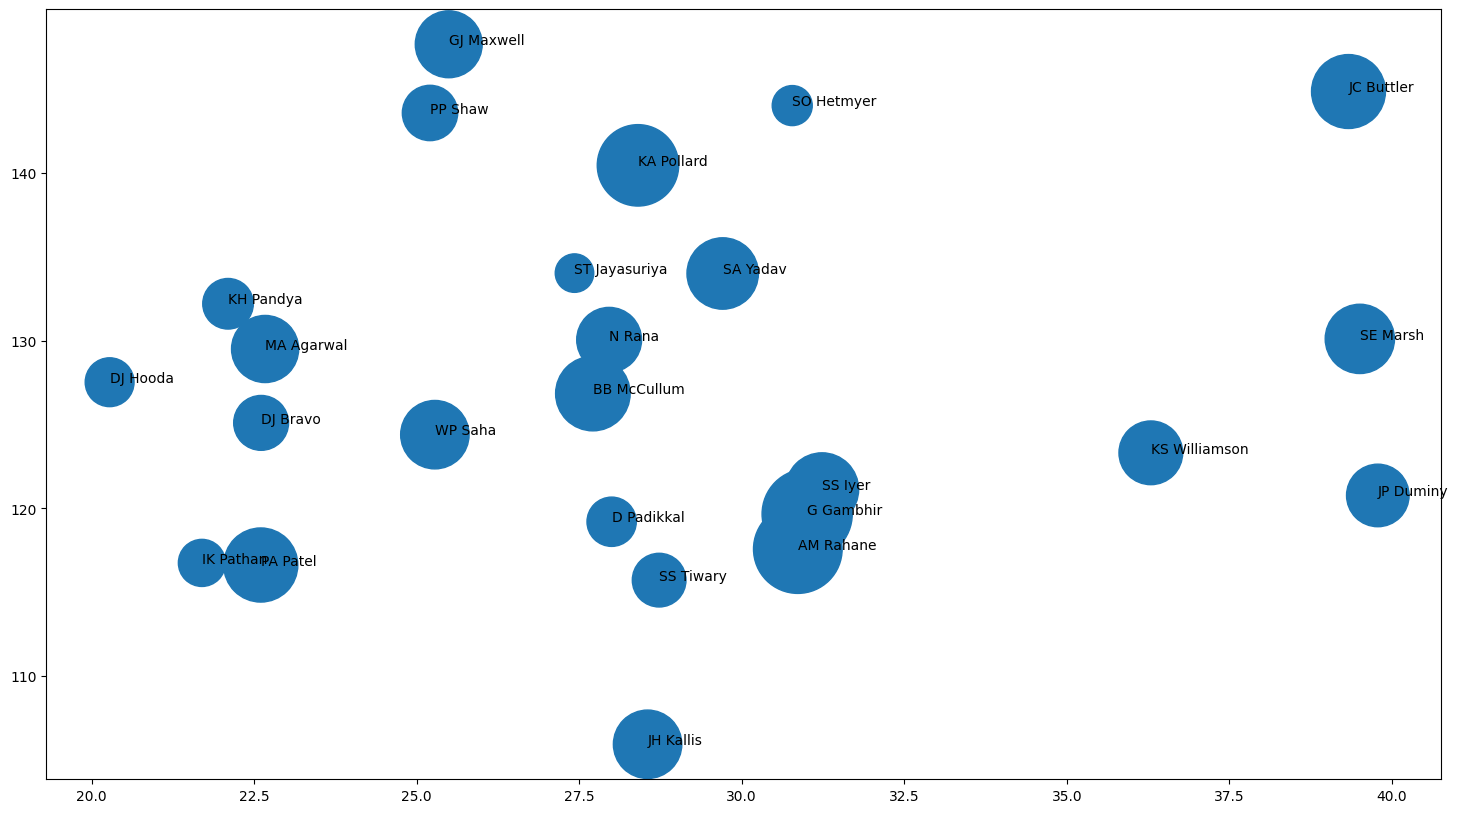

In [13]:
plt.figure(figsize=(18,10))
plt.scatter(sample_df['avg'],sample_df['strike_rate'],s=sample_df['runs'])

for i in range(sample_df.shape[0]):
    plt.text(sample_df['avg'].values[i],sample_df['strike_rate'].values[i],sample_df['batter'].values[i])


Text(4, 8, 'Point 4')

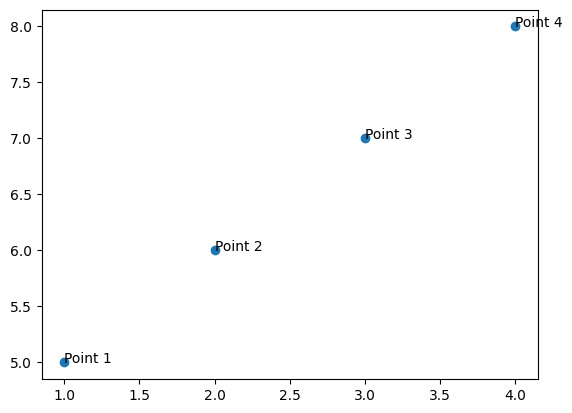

In [14]:
x = [1,2,3,4]
y = [5,6,7,8]

plt.scatter(x,y)

plt.text(1,5,'Point 1')
plt.text(2,6,'Point 2')
plt.text(3,7,'Point 3')
plt.text(4,8,'Point 4')

#### Horizontal and Vertical lines

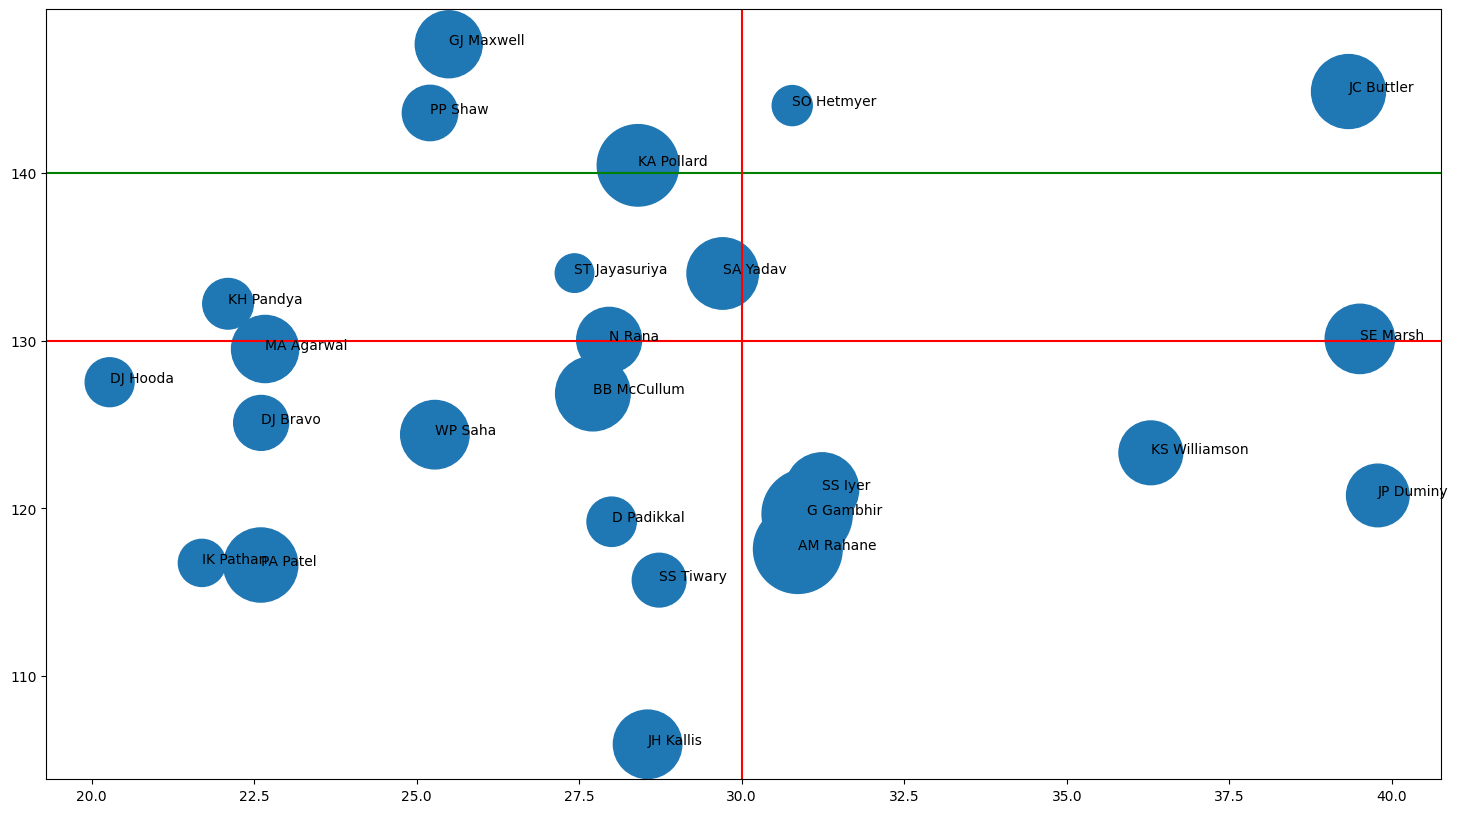

In [15]:
plt.figure(figsize=(18,10))
plt.scatter(sample_df['avg'],sample_df['strike_rate'],s=sample_df['runs'])

plt.axhline(130,color='red')
plt.axhline(140,color='green')
plt.axvline(30,color='red')

for i in range(sample_df.shape[0]):
    plt.text(sample_df['avg'].values[i],sample_df['strike_rate'].values[i],sample_df['batter'].values[i])

#### subplots

In [16]:
batters.head()

,batter,runs,avg,strike_rate
0,V Kohli,6634,36.251366,125.977972
1,S Dhawan,6244,34.882682,122.840842
2,DA Warner,5883,41.429577,136.401577
3,RG Sharma,5881,30.314433,126.964594
4,SK Raina,5536,32.374269,132.535312


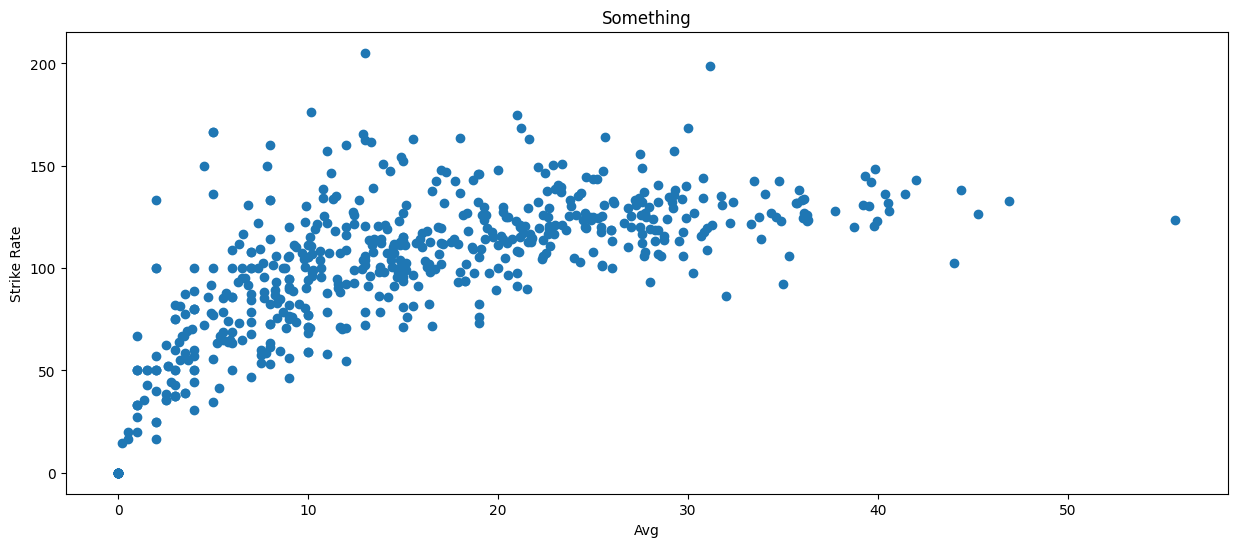

In [17]:
plt.figure(figsize=(15,6))

plt.scatter(batters['avg'],batters['strike_rate'])
plt.title('Something')
plt.xlabel('Avg')
plt.ylabel('Strike Rate')

plt.show()

Text(0, 0.5, 'Strike Rate')

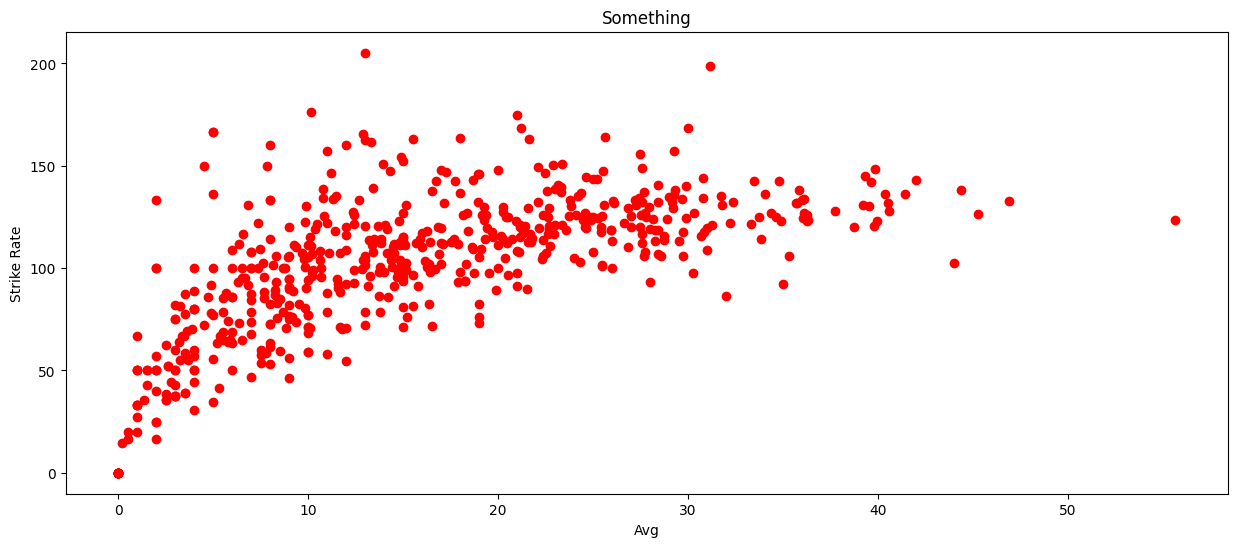

In [20]:
fig,ax = plt.subplots(figsize=(15,6))

ax.scatter(batters['avg'],batters['strike_rate'],color='red')
ax.set_title('Something')
ax.set_xlabel('Avg')
ax.set_ylabel('Strike Rate')

Text(0.5, 0, 'Avg')

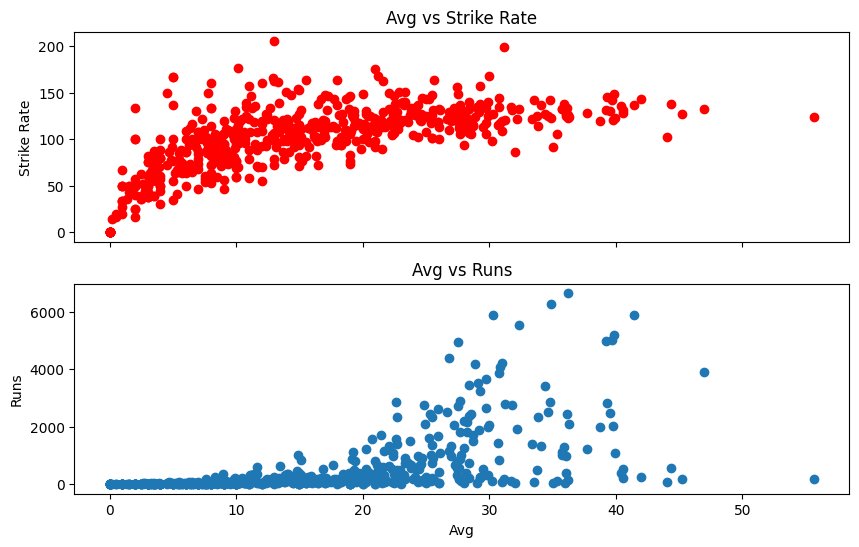

In [21]:
fig,ax = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(10,6))

ax[0].scatter(batters['avg'],batters['strike_rate'],color='red')
ax[1].scatter(batters['avg'],batters['runs'])

ax[0].set_title('Avg vs Strike Rate')
ax[0].set_ylabel('Strike Rate')

ax[1].set_title('Avg vs Runs')
ax[1].set_ylabel('Runs')
ax[1].set_xlabel('Avg')

(array([499.,  40.,  19.,  19.,   9.,   6.,   4.,   4.,   3.,   2.]),
 array([   0. ,  663.4, 1326.8, 1990.2, 2653.6, 3317. , 3980.4, 4643.8,
        5307.2, 5970.6, 6634. ]),
 <BarContainer object of 10 artists>)

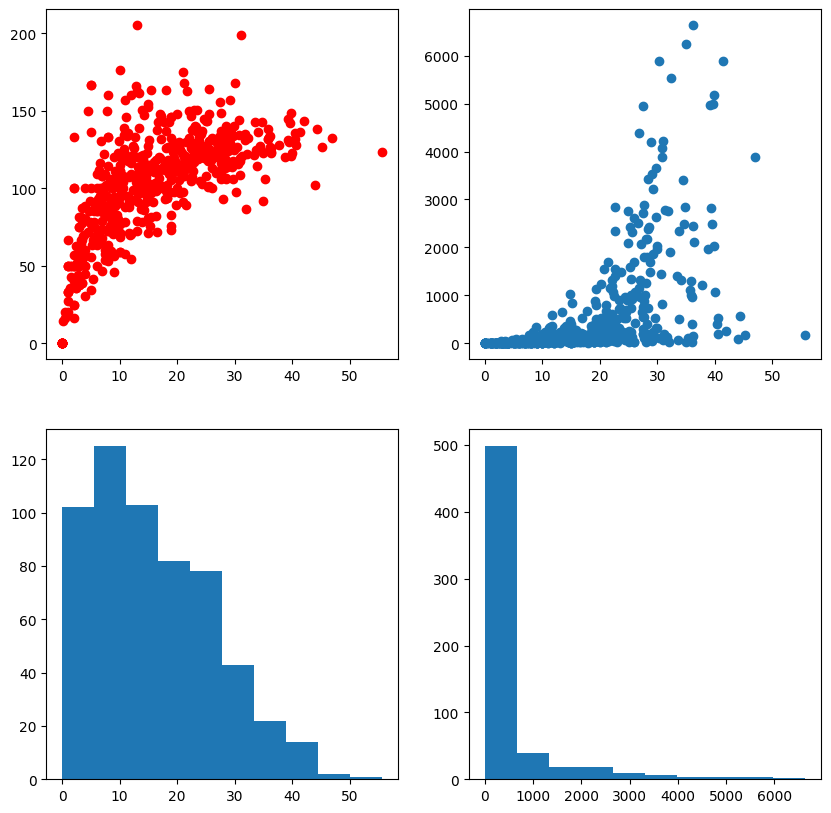

In [23]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

ax[0,0].scatter(batters['avg'],batters['strike_rate'],color='red')
ax[0,1].scatter(batters['avg'],batters['runs'])
ax[1,0].hist(batters['avg'])
ax[1,1].hist(batters['runs'])

#### 3D Scatter plots

In [24]:
batters

,batter,runs,avg,strike_rate
0,V Kohli,6634,36.251366,125.977972
1,S Dhawan,6244,34.882682,122.840842
2,DA Warner,5883,41.429577,136.401577
3,RG Sharma,5881,30.314433,126.964594
4,SK Raina,5536,32.374269,132.535312
...,...,...,...,...
600,C Nanda,0,0.000000,0.000000
601,Akash Deep,0,0.000000,0.000000
602,S Ladda,0,0.000000,0.000000
603,V Pratap Singh,0,0.000000,0.000000


Text(0.5, 0, 'Strike Rate')

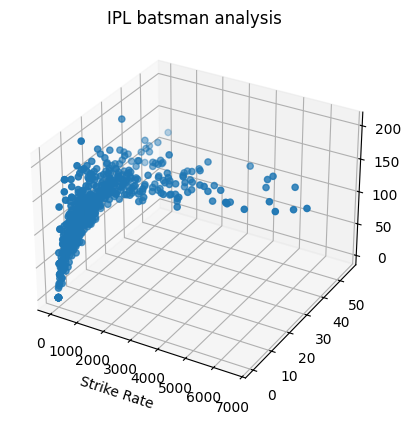

In [27]:
fig = plt.figure()

ax = plt.subplot(projection='3d')
ax.scatter3D(batters['runs'],batters['avg'],batters['strike_rate'])

ax.set_title('IPL batsman analysis')
ax.set_xlabel('Runs')
ax.set_xlabel('Avg')
ax.set_xlabel('Strike Rate')

#### 3D Lineplot

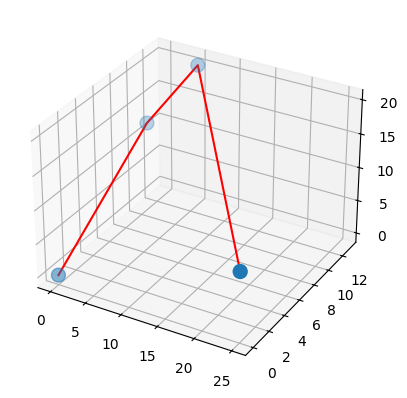

In [31]:
x = [0,1,5,25]
y = [0,10,13,0]
z = [0,13,20,9]

# fig = plt.figure()

ax = plt.subplot(projection='3d')
ax.scatter3D(x,y,z,s=[100,100,100,100])
ax.plot3D(x,y,z,color='red')


#### 3D Surface plot (Highly used to plot loss function)

In [32]:
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

In [33]:
xx,yy = np.meshgrid(x,y)

In [34]:
xx.shape

(100, 100)

In [36]:
z = xx**2 + yy**2
z.shape

(100, 100)

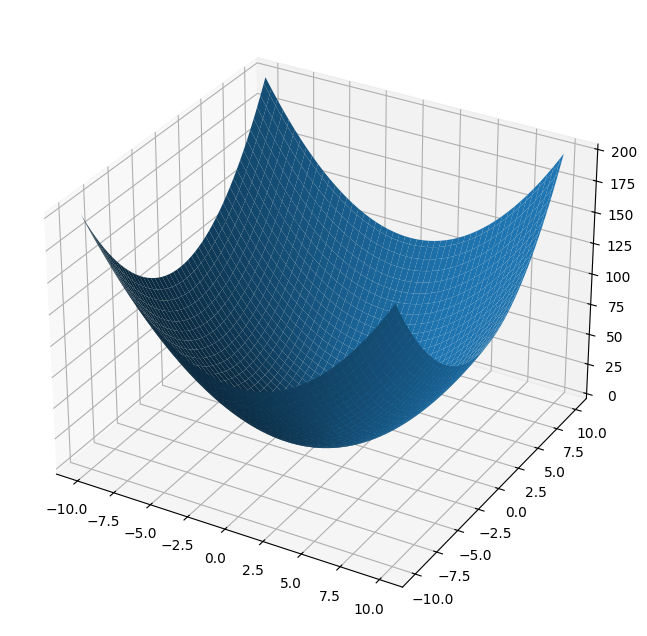

In [38]:
fig = plt.figure(figsize=(12,8))

ax = plt.subplot(projection='3d')

ax.plot_surface(xx,yy,z)


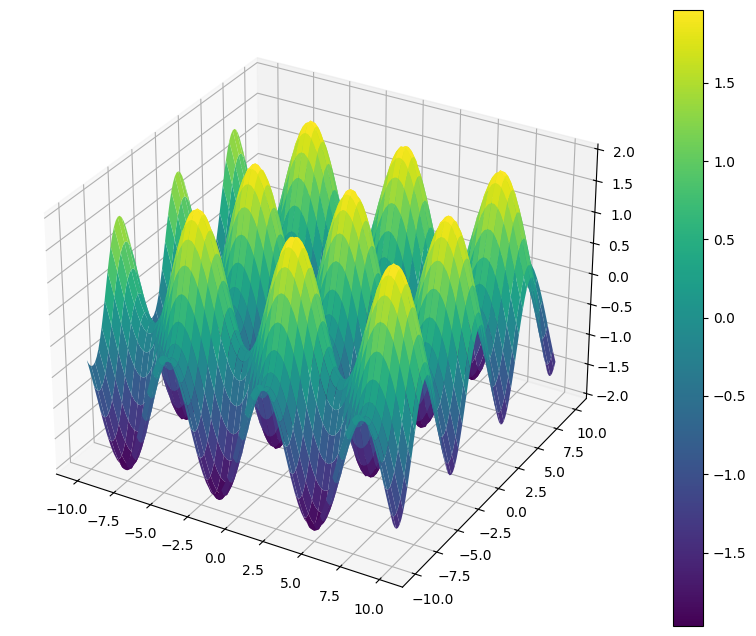

In [40]:
z = np.sin(xx) + np.cos(yy)
fig = plt.figure(figsize=(12,8))

ax = plt.subplot(projection='3d')

p = ax.plot_surface(xx,yy,z,cmap='viridis')
fig.colorbar(p)

#### Contour plots

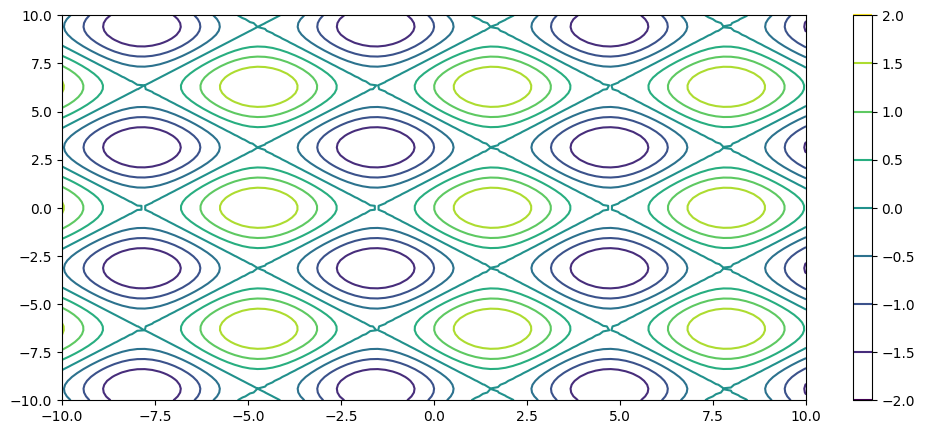

In [41]:
fig = plt.figure(figsize=(12,5))

ax = plt.subplot()

p = ax.contour(xx,yy,z,cmap='viridis')
fig.colorbar(p)

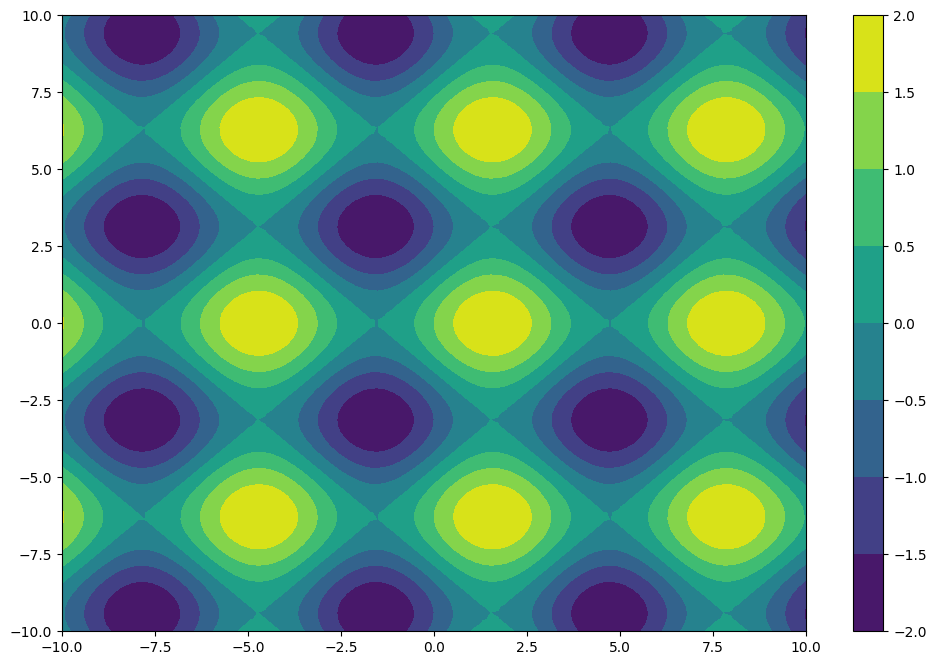

In [42]:
fig = plt.figure(figsize=(12,8))

ax = plt.subplot()

p = ax.contourf(xx,yy,z,cmap='viridis')
fig.colorbar(p)

#### Heatmap

In [43]:
delivery = pd.read_csv('data/IPL_Ball_by_Ball_2008_2022.csv')
delivery.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [44]:
temp_df = delivery[(delivery['ballnumber'].isin([1,2,3,4,5,6])) & (delivery['batsman_run']==6)]

In [47]:
grid = temp_df.pivot_table(index='overs',columns='ballnumber',values='batsman_run',aggfunc='count')

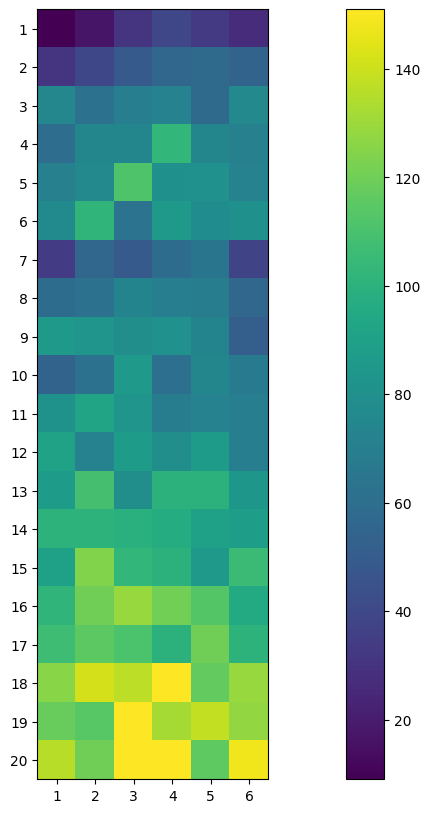

In [60]:
plt.figure(figsize=(20,10))
plt.imshow(grid)
plt.yticks(delivery['overs'].unique(),list(range(1,21)))
plt.xticks(np.arange(0,6),list(range(1,7)))
plt.colorbar()

#### Pandas plot

<Axes: >

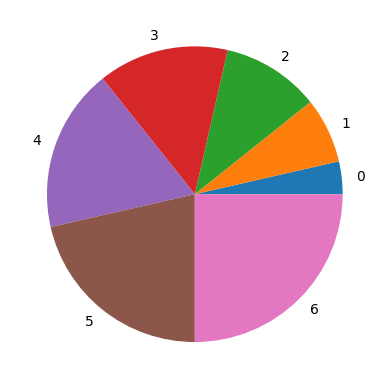

In [49]:
s = pd.Series([1,2,3,4,5,6,7])
s.plot(kind='pie')

In [50]:
tips = pd.read_csv('data/tips.csv')

In [51]:
tips['size'] = tips['size'] * 100

In [52]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,200
1,10.34,1.66,Male,No,Sun,Dinner,300
2,21.01,3.50,Male,No,Sun,Dinner,300
3,23.68,3.31,Male,No,Sun,Dinner,200
4,24.59,3.61,Female,No,Sun,Dinner,400


In [56]:
tips['sex'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Name: sex, Length: 244, dtype: bool

In [57]:
tips['sex'] = tips['sex'].replace({'Male':0,'Female':1})

/var/folders/2n/v2zy3n991d94k9g19pvh8k5m0000gn/T/ipykernel_74550/216236681.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tips['sex'] = tips['sex'].replace({'Male':0,'Female':1})


<Axes: title={'center': 'Cost Analysis'}, xlabel='total_bill', ylabel='tip'>

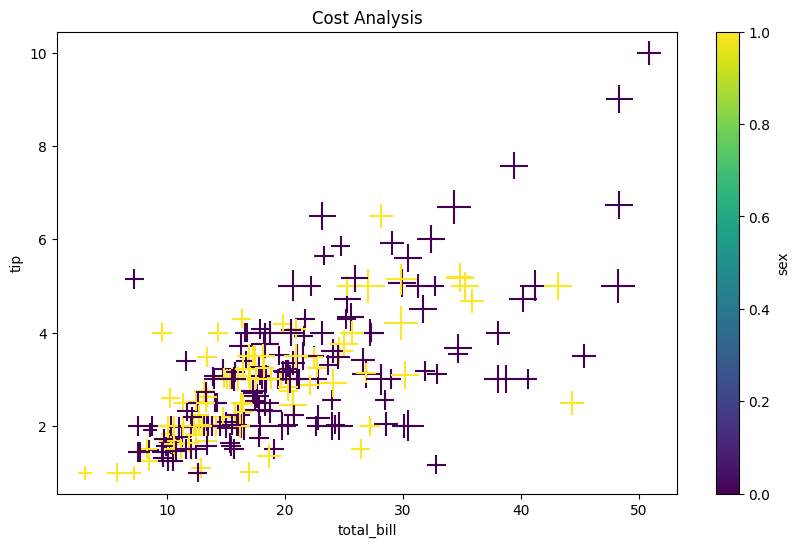

In [58]:
# Scatter plot -> labels -> markers -> figsize -> color -> cmap
tips.plot(kind='scatter',x='total_bill',y='tip',title='Cost Analysis',marker='+',figsize=(10,6),s='size',c='sex',cmap='viridis')

In [61]:
stocks = pd.read_csv('data/weekly_stocks.csv')

<Axes: >

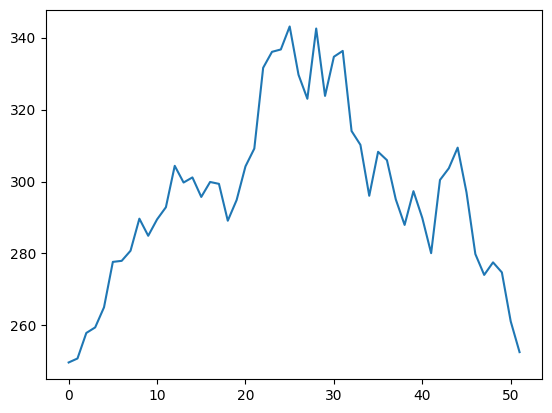

In [62]:
# line plot
stocks['MSFT'].plot(kind='line')

<Axes: xlabel='Date'>

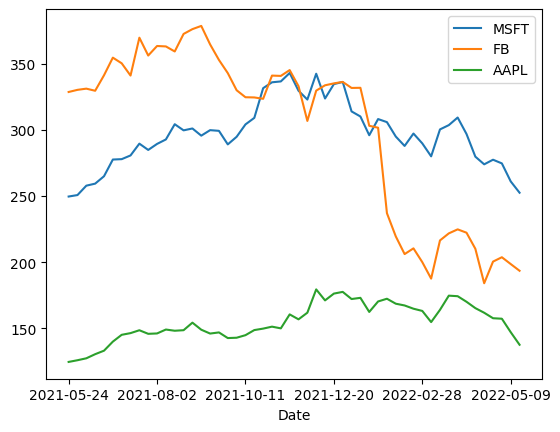

In [63]:
stocks.plot(kind='line',x='Date')

<Axes: xlabel='Date'>

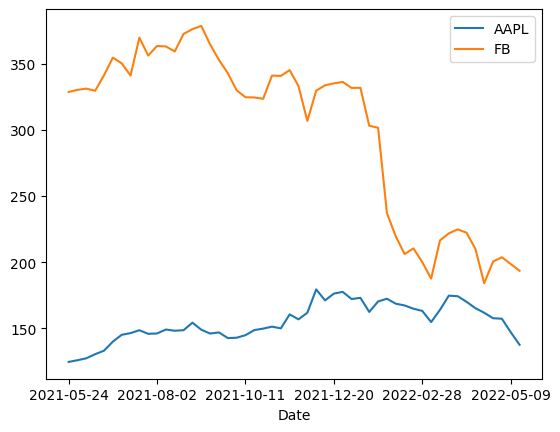

In [64]:
stocks[['Date','AAPL','FB']].plot(kind='line',x='Date')

In [65]:
# bar chart -> single -> horizontal -> multiple
# using tips
temp = pd.read_csv('data/batsman_season_record.csv')
temp.head()

,batsman,2015,2016,2017
0,AB de Villiers,513,687,216
1,DA Warner,562,848,641
2,MS Dhoni,372,284,290
3,RG Sharma,482,489,333
4,V Kohli,505,973,308


<Axes: xlabel='sex'>

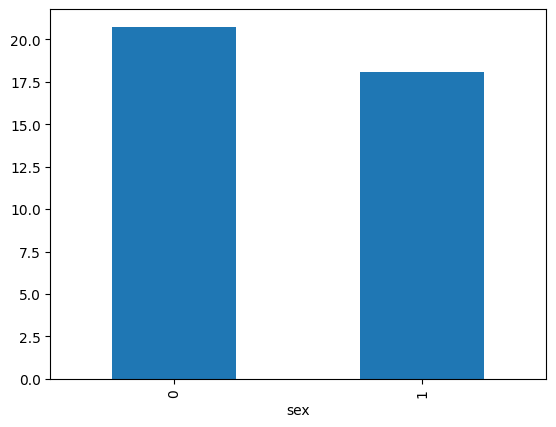

In [66]:
tips.groupby('sex')['total_bill'].mean().plot(kind='bar')

<Axes: >

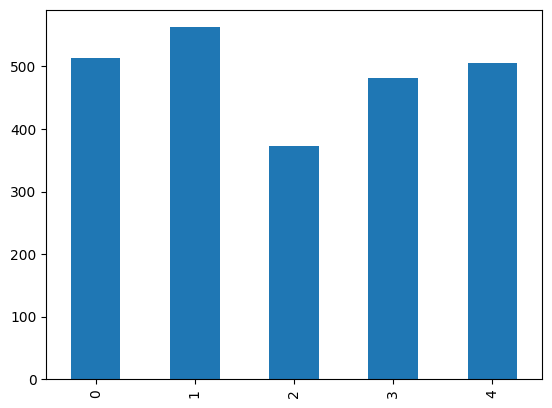

In [67]:
temp['2015'].plot(kind='bar')

<Axes: >

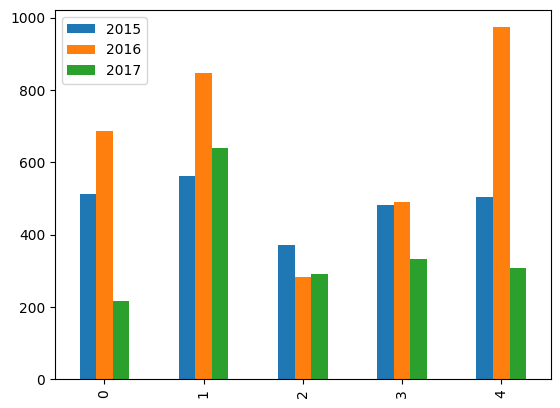

In [68]:
temp.plot(kind='bar')

<Axes: >

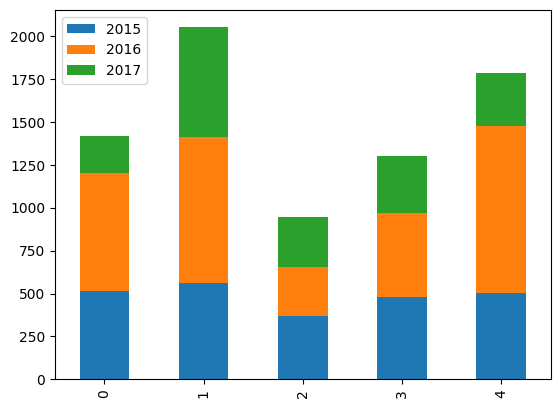

In [69]:
#stacked bar chart
temp.plot(kind='bar',stacked='True')

<Axes: ylabel='Frequency'>

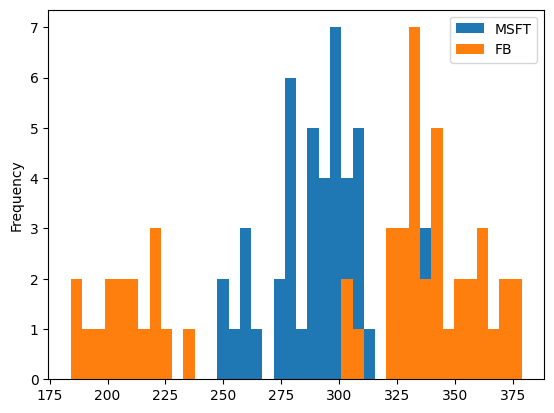

In [72]:
#histogram
# using stocks

stocks[['MSFT','FB']].plot(kind='hist',bins=40)

In [73]:
# pie -> single and multiple
df = pd.DataFrame(
    {
        'batsman':['Dhawan','Rohit','Kohli','SKY','Pandya','Pant'],
        'match1':[120,90,35,45,12,10],
        'match2':[0,1,123,130,34,45],
        'match3':[50,24,145,45,10,90]
    }
)

df.head()

,batsman,match1,match2,match3
0,Dhawan,120,0,50
1,Rohit,90,1,24
2,Kohli,35,123,145
3,SKY,45,130,45
4,Pandya,12,34,10


<Axes: ylabel='match1'>

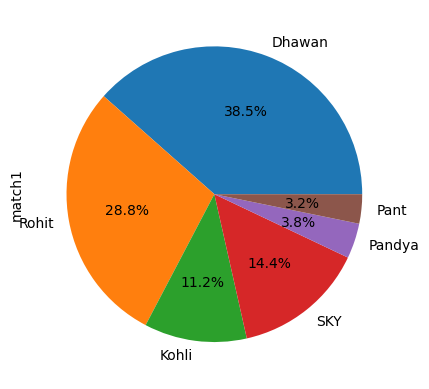

In [74]:
df['match1'].plot(kind='pie',labels=df['batsman'].values,autopct='%0.1f%%')

array([<Axes: ylabel='match1'>, <Axes: ylabel='match2'>,
       <Axes: ylabel='match3'>], dtype=object)

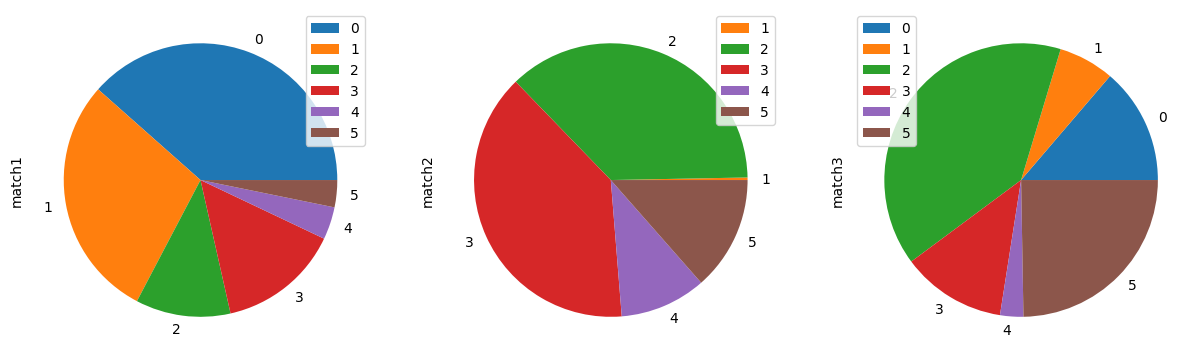

In [75]:
df[['match1','match2','match3']].plot(kind='pie',subplots=True,figsize=(15,8))

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

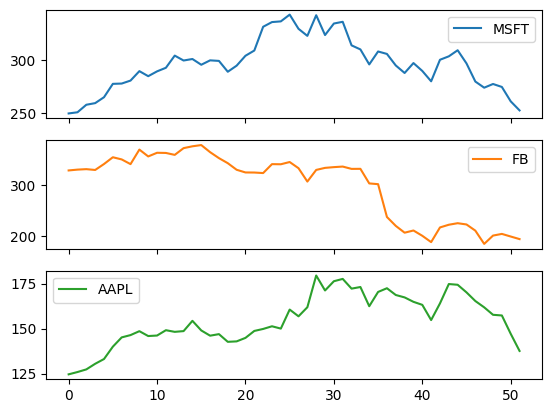

In [76]:
# multiple separate graphs together
# using stocks

stocks.plot(kind='line',subplots=True)

In [ ]:
# on multiindex dataframes
# using tips

array([<Axes: ylabel='(0, No)'>, <Axes: ylabel='(0, Yes)'>,
       <Axes: ylabel='(1, No)'>, <Axes: ylabel='(1, Yes)'>], dtype=object)

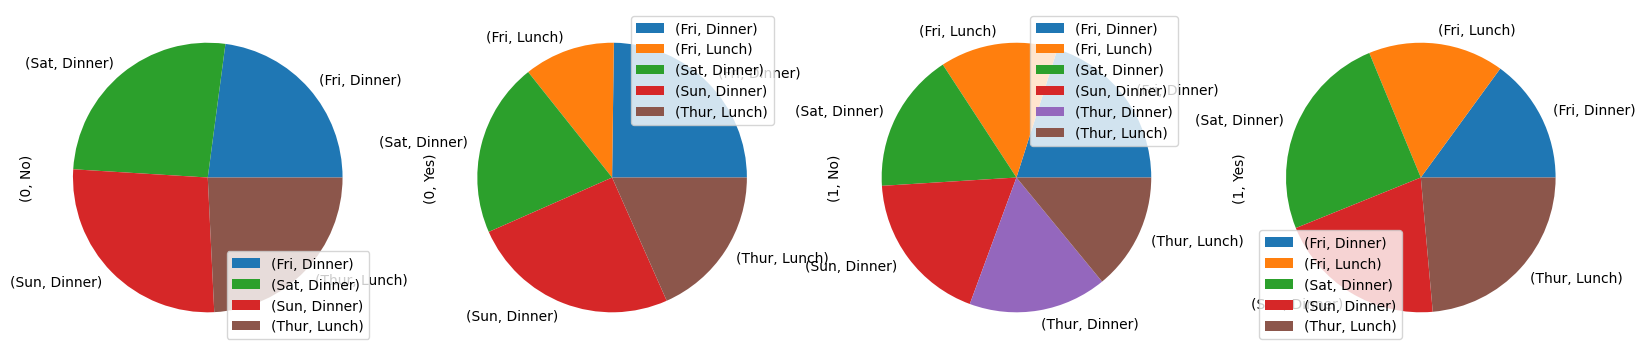

In [77]:
tips.pivot_table(index=['day','time'],columns=['sex','smoker'],values='total_bill',aggfunc='mean').plot(kind='pie',subplots=True,figsize=(20,10))

In [78]:
stocks.plot(kind='scatter3D')

ValueError: scatter3D is not a valid plot kind Valid plot kinds: ('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin')